#### Required Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### Example using matplotlib

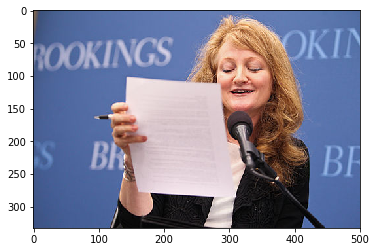

In [2]:
img_path = 'test_image.jpg'

plt.imshow(plt.imread(img_path))
plt.show()

# Colors

#### BGR
As default opencv loads images as BGR instead of RGB.

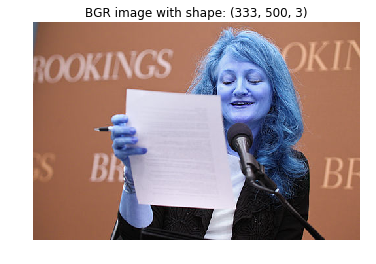

In [3]:
image = cv2.imread(img_path)

plt.title('BGR image with shape: %s'%str(image.shape))
plt.imshow(image)
plt.axis('off')
plt.show()

#### Converting to RGB

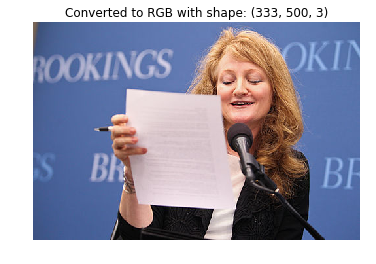

In [4]:
image     = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.title('Converted to RGB with shape: %s'%str(image_rgb.shape))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

You can verify this by switching the channels of r and b using `split` for extracting the channels

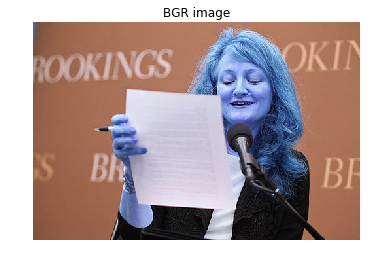

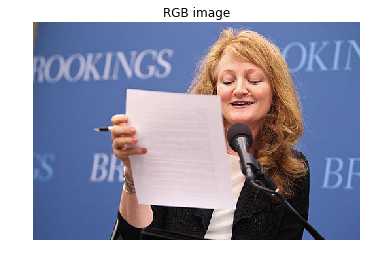

In [5]:
image = cv2.imread(img_path)
b,g,r = cv2.split(image)

plt.title('BGR image')
plt.imshow(cv2.merge((b,g,r)))
plt.axis('off')
plt.show()

plt.title('RGB image')
plt.imshow(cv2.merge((r,g,b)))
plt.axis('off')
plt.show()

#### Converting to black/white

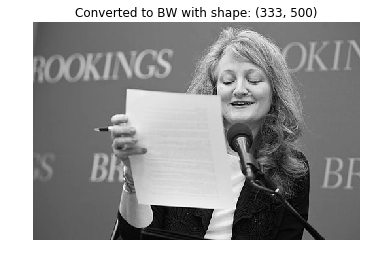

In [6]:
image     = cv2.imread(img_path)
image_bw  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.title('Converted to BW with shape: %s'%str(image_bw.shape))
plt.imshow(image_bw, cmap='gray')
plt.axis('off')
plt.show()

# Edge detection

#### Canny

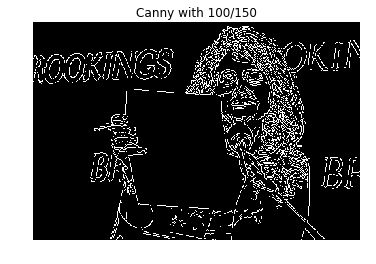

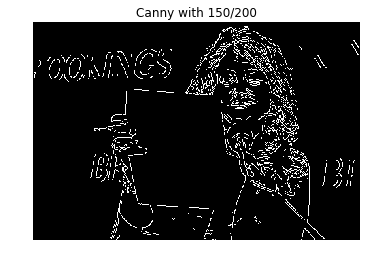

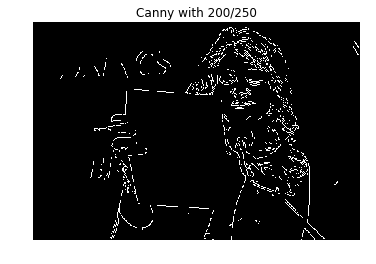

In [7]:
# Canny 100/150
canny = cv2.Canny(image_rgb, 100, 150) 
plt.title('Canny with 100/150')
plt.imshow(canny, cmap='gray')
plt.axis('off')
plt.show()


# Canny 150/200
canny = cv2.Canny(image_bw, 150, 200) 
plt.title('Canny with 150/200')
plt.imshow(canny, cmap='gray')
plt.axis('off')
plt.show()


# Canny 200/250
canny = cv2.Canny(image_bw, 200, 250) 
plt.title('Canny with 200/250')
plt.imshow(canny, cmap='gray')
plt.axis('off')
plt.show()

#### Laplacian

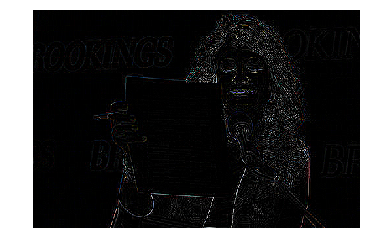

In [8]:
laplacian = cv2.Laplacian(image, cv2.CV_8U)

# Plot
plt.imshow(laplacian)
plt.axis('off')
plt.show()

#### Soebel

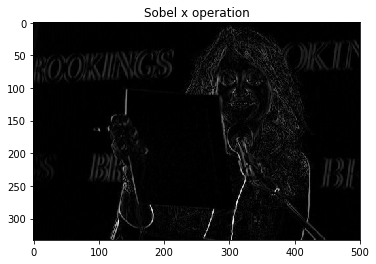

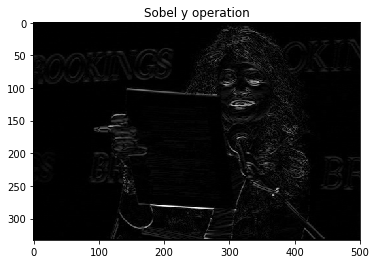

In [9]:
sobelx = cv2.Sobel(image_bw, cv2.CV_64F, dx=1, dy=0)

plt.title('Sobel x operation')
plt.imshow(cv2.absdiff(0.0, sobelx), cmap='gray')
plt.show()


sobely = cv2.Sobel(image_bw, cv2.CV_64F, dx=0, dy=1)

plt.title('Sobel y operation')
plt.imshow(cv2.absdiff(0.0, sobely), cmap='gray')
plt.show()

#### Finding contours using B/W image and rendering on RGB image

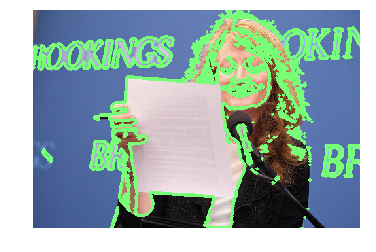

In [10]:
ret,thresh = cv2.threshold(image_bw, 127,255,0) 

im, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
img_contours = cv2.drawContours(np.copy(image_rgb), contours, -1, (120, 255, 120), 3) 

# Plot
plt.imshow(img_contours)
plt.axis('off')
plt.show()

# Shapes

#### Rectangle

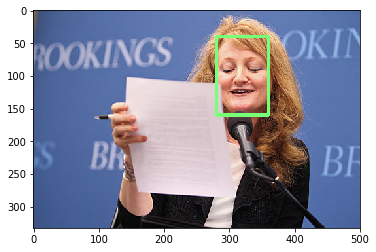

In [11]:
x = 280
y = 40

x_margin = 80
y_margin = 120

img_rect = cv2.rectangle(np.copy(image_rgb), (x,y), (x+x_margin, y+y_margin), (120,255,120), 4)

# Plot
plt.imshow(img_rect)
plt.show()

#### Circle

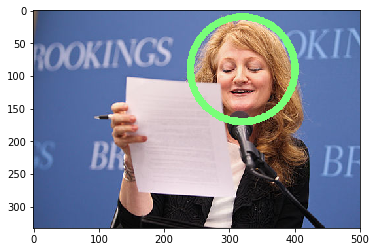

In [12]:
x = 320
y = 90
s = 80

img_circ = cv2.circle(np.copy(image_rgb), (x, y), s, (120,255,120), 10) 

# Plot
plt.imshow(img_circ)
plt.show()

#### Polygon

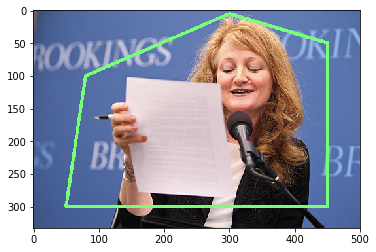

In [13]:
points = np.array( [[300,5], [450,50], [450,300], [50,300], [80,100]])
img_poly = cv2.polylines(np.copy(image_rgb), [points], True, (120,255,120), 3)

# Plot
plt.imshow(img_poly)
plt.show()

#### Text

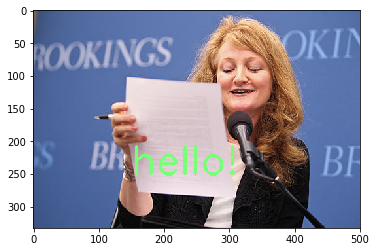

In [14]:
img_txt = cv2.putText(np.copy(image_rgb), 'hello!', (150,250), cv2.FONT_ITALIC, 2, (120,255,120), 3)

# Plot
plt.imshow(img_txt)
plt.show()

# Histograms

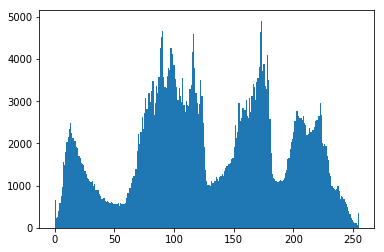

In [15]:
image = cv2.imread(img_path)

plt.hist(image.ravel(), 255, [0,255])
plt.show()

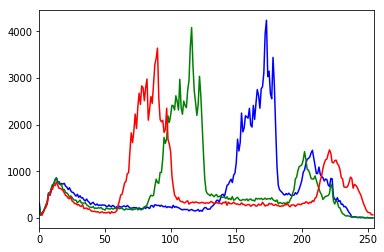

In [16]:
# keep in mind that opencv works with bgr
for i, color in enumerate(['b','g','r']): 
    histogram = cv2.calcHist([image], [i], None, [255], [0,255])
    plt.plot(histogram, color=color)
    plt.xlim([0,255])
plt.show()

# Noise

#### Dilating

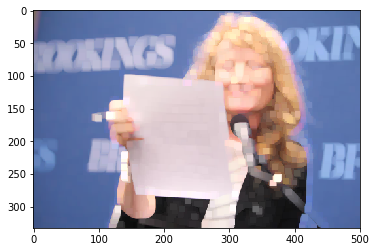

In [17]:
dilate_img = cv2.dilate(image_rgb.copy(), np.ones((5,5)), iterations=2)
plt.imshow(dilate_img)
plt.show()

#### Blurring

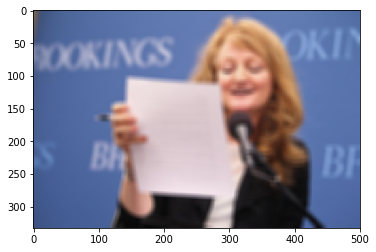

In [18]:
blur = cv2.blur(image_rgb, (10,10))

plt.imshow(blur)
plt.show()

#### Gaussian Blur

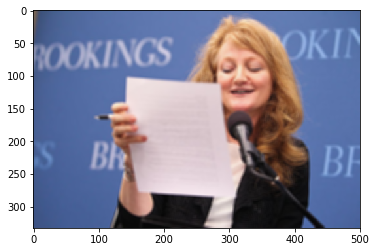

In [19]:
gaussian = cv2.GaussianBlur(image_rgb, (5,5), 10)

plt.imshow(gaussian)
plt.show()

#### Remove noise

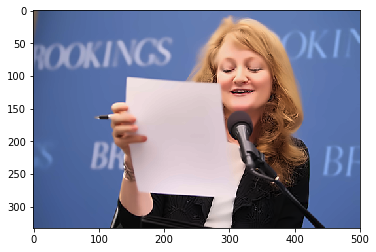

In [20]:
dst = cv2.fastNlMeansDenoisingColored(image_rgb, None, 10)
plt.imshow(dst)
plt.show()

# Transpose

#### Rotate image

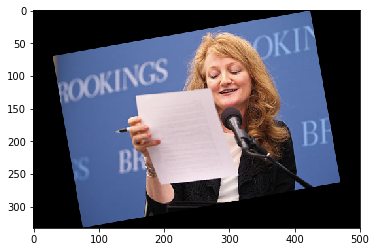

In [21]:
img_width  = image_rgb.shape[1]
img_height = image_rgb.shape[0]
ratio = .8

matrix = cv2.getRotationMatrix2D((img_width/2, img_height/2), 10, ratio)
image_rotate = cv2.warpAffine(image_rgb, matrix, (img_width,img_height))

plt.imshow(image_rotate)
plt.show()

#### Crop image

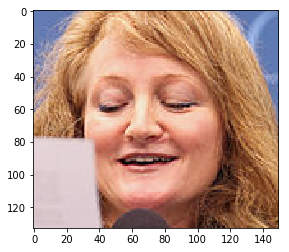

In [22]:
height, width = image_rgb.shape[:2]

start_row, start_col = int(height * .1), int(width * .5)
end_row, end_col = int(height * 0.5), int(width * 0.8)

cropped = image_rgb[start_row:end_row , start_col:end_col]

plt.imshow(cropped) 
plt.show() 

#### Scaling

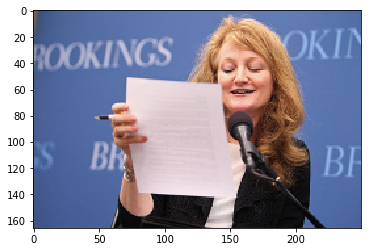

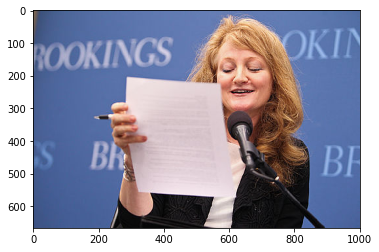

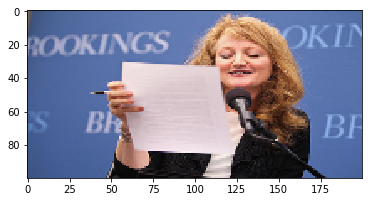

In [23]:
# 1/2 of original image
image_small = cv2.resize(image_rgb, None, fx=0.5, fy=0.5)
plt.imshow(image_small) 
plt.show()

# Double of original image
img_big = cv2.resize(image_rgb, None, fx=2, fy=2)
plt.imshow(img_big)
plt.show()

# Setting exact dimensions
img_exact = cv2.resize(image_rgb, (200, 100))
plt.imshow(img_exact)
plt.show()